<a href="https://colab.research.google.com/github/18sarru/CSLR21-/blob/master/tensor_PCA_of_fwd_and_inv_saak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import division, print_function

import numpy as np

try:
    from pylab import plt
except ImportError:
    print('Unable to import pylab. R_pca.plot_fit() will not work.')

try:
    # Python 2: 'xrange' is the iterative version
    range = xrange
except NameError:
    # Python 3: 'range' is iterative - no need for 'xrange'
    pass


class R_pca:

    def __init__(self, D, mu=None, lmbda=None):
        self.D = D
        self.S = np.zeros(self.D.shape)
        self.Y = np.zeros(self.D.shape)

        if mu:
            self.mu = mu
        else:
            self.mu = np.prod(self.D.shape) / (4 * np.linalg.norm(self.D, ord=1))

        self.mu_inv = 1 / self.mu

        if lmbda:
            self.lmbda = lmbda
        else:
            self.lmbda = 1 / np.sqrt(np.max(self.D.shape))

    @staticmethod
    def frobenius_norm(M):
        return np.linalg.norm(M, ord='fro')

    @staticmethod
    def shrink(M, tau):
        return np.sign(M) * np.maximum((np.abs(M) - tau), np.zeros(M.shape))

    def svd_threshold(self, M, tau):
        U, S, V = np.linalg.svd(M, full_matrices=False)
        return np.dot(U, np.dot(np.diag(self.shrink(S, tau)), V))

    def fit(self, tol=None, max_iter=1000, iter_print=100):
        iter = 0
        err = np.Inf
        Sk = self.S
        Yk = self.Y
        Lk = np.zeros(self.D.shape)

        if tol:
            _tol = tol
        else:
            _tol = 1E-7 * self.frobenius_norm(self.D)

        #this loop implements the principal component pursuit (PCP) algorithm
        #located in the table on page 29 of https://arxiv.org/pdf/0912.3599.pdf
        while (err > _tol) and iter < max_iter:
            Lk = self.svd_threshold(
                self.D - Sk + self.mu_inv * Yk, self.mu_inv)                            #this line implements step 3
            Sk = self.shrink(
                self.D - Lk + (self.mu_inv * Yk), self.mu_inv * self.lmbda)             #this line implements step 4
            Yk = Yk + self.mu * (self.D - Lk - Sk)                                      #this line implements step 5
            err = self.frobenius_norm(self.D - Lk - Sk)
            iter += 1
            if (iter % iter_print) == 0 or iter == 1 or iter > max_iter or err <= _tol:
                print('iteration: {0}, error: {1}'.format(iter, err))

        self.L = Lk
        self.S = Sk
        return Lk, Sk

    def plot_fit(self, size=None, tol=0.1, axis_on=True):

        n, d = self.D.shape

        if size:
            nrows, ncols = size
        else:
            sq = np.ceil(np.sqrt(n))
            nrows = int(sq)
            ncols = int(sq)

        ymin = np.nanmin(self.D)
        ymax = np.nanmax(self.D)
        print('ymin: {0}, ymax: {1}'.format(ymin, ymax))

        numplots = np.min([n, nrows * ncols])
        plt.figure()

        for n in range(numplots):
            plt.subplot(nrows, ncols, n + 1)
            plt.ylim((ymin - tol, ymax + tol))
            plt.plot(self.L[n, :] + self.S[n, :], 'r')
            plt.plot(self.L[n, :], 'b')
            if not axis_on:
                plt.axis('off')

In [ ]:
import torch
import cv2
import argparse
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch import nn


#import pycuda.autoinit
#import pycuda.gpuarray as gpuarray
#import skcuda.linalg as linalg
#from skcuda.linalg import PCA as cuP
 
# Import the necessary libraries 
from PIL import Image 
import torch.utils.data as data_utils
from sklearn.decomposition import KernelPCA , PCA
import torch.nn.functional as F
from torch.autograd import Variable

print(torch.cuda.device_count())

0


In [ ]:
data_transforms = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Grayscale(num_output_channels=1)
])

batch_size=1
test_batch_size=1

# Comment 1 : Load the datasets with ImageFolder
image_datasets = datasets.ImageFolder(root= "/content/drive/My Drive/idk/", transform=data_transforms)
# Comment 2: Using the image datasets and the transforms, define the dataloadersd
train_loader = torch.utils.data.DataLoader(image_datasets, batch_size=1, shuffle=True, num_workers=2)

In [ ]:
print (torch.__version__)
batch_size=1
test_batch_size=1
kwargs={}
print("wyn")
train_loader=data_utils.DataLoader(datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.Compose([
    transforms.Scale((32,32)),
    transforms.ToTensor(),
    transforms.Grayscale(num_output_channels=1)
])),batch_size=batch_size,shuffle=True,**kwargs)

test_loader=data_utils.DataLoader(datasets.CIFAR10(root='./data',train=False,download=True,transform=transforms.Compose([
    transforms.Scale((32,32)),
    transforms.ToTensor(),
    transforms.Grayscale(num_output_channels=1)
])),batch_size=test_batch_size,shuffle=True,**kwargs)



1.8.0+cu101
wyn


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:285: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +



Extracting ./data/cifar-10-python.tar.gz to ./data


KeyboardInterrupt: ignored

In [ ]:
def create_numpy_dataset():
    datasets = []
    for data in train_loader:
        data_numpy = data[0].numpy()
        data_numpy = np.squeeze(data_numpy)
        datasets.append(data_numpy)

    datasets = np.array(datasets)
    datasets=np.expand_dims(datasets,axis=1)
    return datasets[:100]



In [ ]:
from itertools import product
def fit_pca_shape(datasets,depth):
    factor=np.power(2,depth)
    length=int(32/factor)
    idx1=range(0,length,2)
    idx2=[i+2 for i in idx1]
    data_lattice=[datasets[:,:,i:j,k:l] for ((i,j),(k,l)) in product(zip(idx1,idx2),zip(idx1,idx2))]
    data_lattice=np.array(data_lattice)
    print ('fit_pca_shape: data_lattice.shape: {}',format(data_lattice.shape))

    #shape reshape
    data=np.reshape(data_lattice,(data_lattice.shape[0]*data_lattice.shape[1],data_lattice.shape[2],2,2))
    print ('fit_pca_shape: reshape: {}',format(data.shape))
    return data

In [ ]:
def ret_filt_patches(aug_anchors,input_channels):
    shape=int(aug_anchors.shape[1]/4)
    num=aug_anchors.shape[0]
    filt=np.reshape(aug_anchors,(num,shape,4))
    
    # reshape to kernels, (# output_channels,# input_channels,2,2)
    filters=np.reshape(filt,(num,shape,2,2))

    return filters

In [ ]:
def pca(data, numComponents=None):
    """Principal Components Analysis

    From: http://stackoverflow.com/a/13224592/834250

    Parameters
    ----------
    data : `numpy.ndarray`
        numpy array of data to analyse
    numComponents : `int`
        number of principal components to use

    Returns
    -------
    comps : `numpy.ndarray`
        Principal components
    evals : `numpy.ndarray`
        Eigenvalues
    evecs : `numpy.ndarray`
        Eigenvectors
    """
    m, n = data.shape
    data -= data.mean(axis=0)
    R = np.cov(data, rowvar=False)
    # use 'eigh' rather than 'eig' since R is symmetric,
    # the performance gain is substantial
    evals, evecs = np.linalg.eigh(R)
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    if numComponents is not None:
        evecs = evecs[:, :numComponents]
    compo=np.dot(evecs.T, data.T).T
    # carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    return compo, evals, evecs


In [ ]:
def PCA_and_augment(data_in):
    # data reshape
    data=np.reshape(data_in,(data_in.shape[0],-1))
    mean=np.mean(data,axis=0)
    datas_mean_remov = data - mean
    
    # use R_pca to estimate the degraded data as L + S, where L is low rank, and S is sparse
    rpca = R_pca(datas_mean_remov)
    L, S = rpca.fit(max_iter=1000, iter_print=100)
    rcomp, revals, revecs = pca(L)
    comps=rcomp
    #X = np.random.rand(1000,100) # 1000 samples of 100-dimensional data vectors
    #X_gpu = gpuarray.GPUArray((1000,100), np.float64, order="F") # note that order="F" or a transpose is necessary. fit_transform requires row-major matrices, and column-major is the default
    #X_gpu.set(X) # copy data to gpu
    #T_gpu = pca.fit_transform(X_gpu) # calculate the principal components
    #linalg.dot(T_gpu[:,0], T_gpu[:,1]) # show that the resulting eigenvectors are orthogonal

    #datas_mean_remov.astype(np.float64)
    #pca.fit(datas_mean_remov)
    #comps=pca.components_

    if comps[-1][0]<0:
        for i in comps:
            i*=-1
    comps_aug=[vec*(-1) for vec in comps]
    comps_complete=np.vstack((comps,comps_aug))
    
    return comps_complete,mean

In [ ]:
def conv_and_relu(filters,datasets,stride=2):
    # torch data change
    
    filters_t=torch.from_numpy(filters)
    datasets_t=torch.from_numpy(datasets)

    # Variables
    filt=Variable(filters_t).type(torch.FloatTensor)
    data=Variable(datasets_t).type(torch.FloatTensor)

    # Convolution
    output=F.conv2d(data,filt,stride=stride)

    # Relu
    relu_output=F.relu(output)

    return relu_output,filt

In [ ]:

def one_stage_saak_trans(datasets,depth):

    print ('one_stage_saak_trans: datasets.shape {}',format(datasets.shape))
    input_channels=datasets.shape[1]

    data_flatten=fit_pca_shape(datasets,depth)
    comps_complete,mean=PCA_and_augment(data_flatten)

    filters=ret_filt_patches(comps_complete,input_channels)
    print ('one_stage_saak_trans: filters: {}',format(filters.shape))

    mean=np.mean(datasets,axis=0)
    datasets-=mean
    relu_output,filt=conv_and_relu(filters,datasets,stride=2)
    res=relu_output.data.numpy()
    
    print ('one_stage_saak_trans final.shape: {}',format(res.shape))

    return res,filt,Variable(torch.from_numpy(res)),mean

In [ ]:

def multi_stage_saak_trans():
    filters = []
    outputs = []
    means=[]
    data=create_numpy_dataset()
    dataset=np.copy(data)
    num=0
    img_len=data.shape[-1]
    while(img_len>=2):
        num+=1
        img_len/=2

    for i in range(num):
        print ('{} stage of saak transform: '. format(i+1))
        data,filt,output,mean=one_stage_saak_trans(data,i)
        filters.append(filt)
        outputs.append(output)
        means.append(mean)
        print ('')

    return dataset,filters,outputs,means

In [ ]:
datas,filters,outputs,means=multi_stage_saak_trans()

1 stage of saak transform: 
one_stage_saak_trans: datasets.shape {} (7, 1, 32, 32)
fit_pca_shape: data_lattice.shape: {} (256, 7, 1, 2, 2)
fit_pca_shape: reshape: {} (1792, 1, 2, 2)
iteration: 1, error: 0.3132719242282281
iteration: 100, error: 0.0015715076508140654
iteration: 200, error: 0.0002908625268771356
iteration: 300, error: 4.318641939012736e-05
iteration: 400, error: 1.2264073483191408e-05
iteration: 500, error: 5.500323108217791e-06
iteration: 600, error: 2.362314281822589e-06
iteration: 607, error: 2.219354851244367e-06
one_stage_saak_trans: filters: {} (3584, 1, 2, 2)
one_stage_saak_trans final.shape: {} (7, 3584, 16, 16)

2 stage of saak transform: 
one_stage_saak_trans: datasets.shape {} (7, 3584, 16, 16)
fit_pca_shape: data_lattice.shape: {} (64, 7, 3584, 2, 2)
fit_pca_shape: reshape: {} (448, 3584, 2, 2)
iteration: 1, error: 0.00018553739025113717
iteration: 49, error: 1.7060932044761184e-05
one_stage_saak_trans: filters: {} (896, 3584, 2, 2)
one_stage_saak_trans final

In [ ]:
from torchvision.utils import save_image
for i in range(0,7):
    x_np = torch.from_numpy(datas[i][0])
    save_image(x_np, "/content/drive/My Drive/idk_saak/adv_tsaak/generated image%d.jpg"%(77+i), normalize = True,)

In [ ]:
#from pathlib import Path
#from torchvision.utils import save_image
#def SaveImage(img,count):
    #save_image(img,"{}.jpg".format(count))
    #Path("/content/drive/My Drive/cw_l2_conv/adv_saak").mkdir(parents=True, exist_ok=True)
    #cv2.imwrite("/content/drive/My Drive/cw_l2_conv/adv_saak/{}.jpg".format(count),img)

In [ ]:
def show_sample(ori,rec,count):
    plt.subplot(1,2,1)
    plt.imshow(ori)
    #SaveImage(rec,count)
    plt.subplot(1,2,2)
    plt.imshow(rec)
    plt.show()

In [ ]:
def psnr(im1,im2):
    diff =(im1 - im2)
    diff=diff**2
    rmse=np.sqrt(np.mean(diff.sum()))
    psnr = 20*np.log10(1/rmse)
    return psnr

In [ ]:
def toy_recon(outputs,filters,means):
    outputs=outputs[::-1][2:]
    filters=filters[::-1][2:]
    means=means[::-1][2:]
    num=len(outputs)
    data=outputs[0]
    for i in range(num):
        data = F.conv_transpose2d(data, filters[i], stride=2)
        data+=Variable(torch.from_numpy(means[i]))
    return data

In [ ]:
ret=toy_recon(outputs,filters,means)

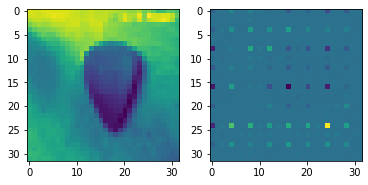

psnr metric: {} -75.91004169216556


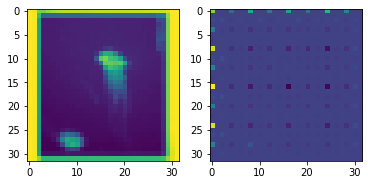

psnr metric: {} -84.26639738152065


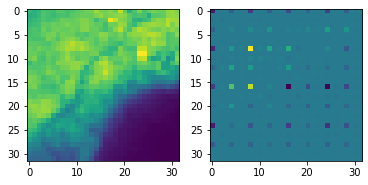

psnr metric: {} -75.3874888185141


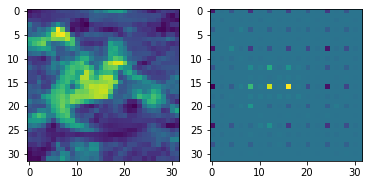

psnr metric: {} -76.1459619891137


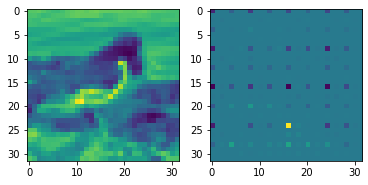

psnr metric: {} -75.3347506015765


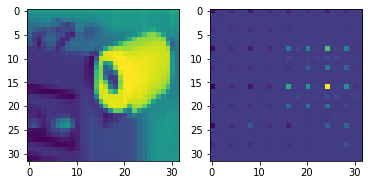

psnr metric: {} -82.46786453200596


IndexError: ignored

In [ ]:
 count=0
 for i in range(0,100):
    inv_img=ret.data.numpy()[i][0]
    count+=1
    show_sample(datas[i][0],inv_img,count)
    print ('psnr metric: {}',format(psnr(datas[i][0],inv_img)))

In [ ]:
def column(matrix, i):
 return [row[i] for row in matrix]
 

In [ ]:
if __name__=='__main__':
 dataset,filters,outputs,means =multi_stage_saak_trans()
 '''print(filters)
 [f,p] = stats.f_oneway(outputs)
 print(f)
 '''
 '''
 test_datasets = [] check
 for data in train_loader:
    data_numpy = data[0].numpy()
    data_numpy = np.squeeze(data_numpy)
    test_datasets.append(data_numpy)
 test_datasets = np.array(test_datasets)
 test_datasets=np.expand_dims(test_datasets,axis=1)
 #print(test_datasets)
 '''
 
 import math
 div = 26 #check
 test = test_datasets[1500:2500]
 test = np.array(test)
 test = test.flatten()
 print(test.shape)
 test = np.reshape(test,(1000,-1))
 print('test shape')
 print(test.shape)
 reduced_set_labels = []
 labels = []
 for data in train_loader:
    labels_numpy = data[1].numpy()
    labels_numpy = np.squeeze(labels_numpy)
    labels.append(labels_numpy)
 labels = np.array(labels)
 reduced_set_labels = labels[:1000]
 
 
 class_indi = [[0 for x in range(200)] for y in range(10)]
 class_indi = np.array(class_indi)
 features = []
 comp = 25
 #print('length of output features')
 #print(len(outputs[4][:,250]))

 #c = []
 #c = np.asarray(column(outputs[4],1998))
 
 #check = [[0 for x in range(1000)] for y in range(1500)]
 #check = np.array(check)
 
 #check[1][:]= outputs[4][:,250]
 #print('check')
 #print(check[1][:])
 #1500 x 1000 array

 num_of_samples = []
 coress_feature = []
 F_score = []
 count =0
 for i in range(): #1999
    BGV = 0.0
    WGV = 0.0
    error1 = 0.0
    features = column(outputs[4], i)
    features = np.array(features)
    sum = np.sum(features[0])
    mean_for_all_classes = sum/1000
    for j in range(10):
        class_sum=0.0
        inter_sum = 0.0
        indi = np.where(reduced_set_labels == j)
        #print('number of samples per class')
        #print((indi[0].shape)[0])
        num_of_samples.append((indi[0].shape)[0])
        indi = np.array(indi)
        error1 = 1-comp/div
        N = 200 - num_of_samples[j]
        indi = np.lib.pad(indi,(0,N),'constant')
        class_indi[j][:] = indi[0]
        error2 = 0.0
        for k in class_indi[j][:]:
            coress_feature  = features[k]
            if(k==(num_of_samples[j]-1)):
                break
        for nums in coress_feature:
            class_sum = class_sum + nums
        mean_of_each_class = class_sum/num_of_samples[j]    
        BGV = BGV + (num_of_samples[j]* pow((np.subtract(mean_for_all_classes,mean_of_each_class)),2)) 
        for nums in coress_feature:
            inter_sum = inter_sum + pow(np.subtract(nums,mean_of_each_class),2)
        WGV = WGV + inter_sum
    BGV = BGV/9    
    WGV = WGV/991
    count = count + 1
    comps = 34
    print('count :%d' %count)
    #print('BGV and WGV values:')
    #print(BGV)
    #print(WGV)
    #print(BGV/WGV)
    F_score.append(BGV/WGV)    
 
 F_score = np.array(F_score).tolist()
 print('F test score')
 print(F_score)
 sorted_index = []
 sorted_index = sorted(range(200), key=lambda k: F_score[k]) # 1999
 sorted_index = np.array(sorted_index).tolist()
 top_feature_index = sorted_index[499:1999]
 n_comps = 64
 divs = n_comps/2 + math.floor(n_comps/21)

 
 reduced_data = [[0 for x in range(1000)] for y in range(1500)] #1500
 #reduced_data = np.array(reduced_data)
 i=0
 error2_ = 0.0
 for cols in top_feature_index:
    print(cols)
    #print('data in cols')
    #print(outputs[4][:][cols])
    reduced_data[i][:] = outputs[4][:,cols]
    i = i + 1
    print(i)
 #print(reduced_data)
 error2 = 1-comps/divs
 reduced_data_arr = np.array(reduced_data)
 reduced_data_arr = reduced_data_arr.transpose()
 print(reduced_data_arr.shape)
 #print(reduced_data_arr)    
 
 #data_PCA = [[0 for x in range(1500)] for y in range(1000)]
 #data_PCA = reduced_data_arr
 #data_PCA = np.array(data_PCA)
 
 pca = PCA(n_components = 64)
 pca.fit(reduced_data_arr)
 data_64 = pca.transform(reduced_data_arr)
 
 
 train_data_64 = [[0 for x in range(64)] for y in range(750)]
 test_data_64 = [[0 for x in range(64)] for y in range(250)]
 
 error1_ = 0
 for i in range(750):
    train_data_64[i][:] = data_64[i,:]
 train_data_64 = np.array(train_data_64)
 print(train_data_64.shape)
 
 
 for i in range(250):
    test_data_64[i][:] = data_64[750+i,:]
 test_data_64 = np.array(test_data_64)
 print(test_data_64.shape)
 reduced_set_train_labels = labels[:750]
 print(reduced_set_train_labels.shape)
 
 
 reduced_set_test_labels = []
 for i in range(250):
   reduced_set_test_labels.append(labels[:750+i])
   reduced_set_test_labels = np.array(reduced_set_test_labels)
   print(reduced_set_test_labels.shape)
 
 clf = svm.SVC(decision_function_shape='ovo')
 clf.fit(train_data_64, reduced_set_train_labels)
 
 training_pred = clf.predict(data_64)
 misclass_train = 0
 train_percent_acc = 0.0
 for i in range(750):
    if training_pred[i] != reduced_set_train_labels[i]:
        misclass_train += 1
 error1_ = misclass_train/1000
 train_percent_acc = (1-error1)*100
 print('traning accuracy :')
 print(train_percent_acc)
 
 testing_pred = clf.predict(test_data_64)
 print(testing_pred.shape)
 testing_pred = testing_pred.tolist()
 
 reduced_set_test_labels = reduced_set_test_labels.tolist()
 misclass = 0
 percent_acc = 0.0
 for i in range(250):
    if testing_pred[i] != reduced_set_test_labels[i]:
        misclass += 1
 error2_ = misclass/1000
 percent_acc = (1-error2)*100
 print('testing accuracy :')
 print(percent_acc)
 
 data=toy_recon(outputs,filters)
 show_sample(data)


KeyboardInterrupt: ignored